<a href="https://www.kaggle.com/code/funxexcel/dsm-1-start-lr-base-solution-framework?scriptVersionId=109244967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification Performance Metrics Calculation
# Must know! when you start to solve classification problems
- 1/ Based on Class ( Yes/No )
    - 1.1/ Accuracy - 2 methods
    - 1.2/ Precision 
    - 1.3/ Recall
    - 1.4/ f1 score
    - 1.5/ classification report
- 2/ Based on Probabilities ( score from 0.0 to 1.0 )
    -2.1/ roc auc score
- 3/ Print Score with proper formatting
    - 0.235423434134 to 0.24

# Setup - Import/ Process/ Build Model/ Predict

In [1]:
# 1/ Import Libraries
import pandas as pd
import numpy as numpy

from sklearn.linear_model import LogisticRegression

# 2/ Import Data
train = pd.read_csv('../input/default-of-credit-card-clients/default of credit card clients.csv')

# 3/ Split columns - into X and y
y_actual = train['dpnm'] # represented by 'y' most often
X = train.drop(['ID','dpnm'], axis = 1)

# 4/ Dummy Encoding
X = pd.get_dummies(X, drop_first = True)

# 5/ Build Model 
lr = LogisticRegression(class_weight = 'balanced', max_iter = 1000)

# 6/ Fit Model
lr.fit(X, y_actual)

# 7/ Predict
# Predict Classes
y_predicted = lr.predict(X)

# Predict Probablities
y_predicted_proba = lr.predict_proba(X)

# Check both

In [2]:
# Predict Actual vs Predicted Classed
pd.DataFrame({
    'y Actual' : y_actual,
    'y Predicted' : y_predicted
}).head()

,y Actual,y Predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,0,1


In [3]:
# Gives predicted Probabilities for both Positive and Negative
print('*Both Class Probabilities')
print('')
print(y_predicted_proba)

# Predict Probablities - Positive Class
print('')
print('**Positive Class Only')
print('')
print(y_predicted_proba[:,1])

*Both Class Probabilities

[[0.43336675 0.56663325]
 [0.49632048 0.50367952]
 [0.46968869 0.53031131]
 ...
 [0.4087237  0.5912763 ]
 [0.76973804 0.23026196]
 [0.36961841 0.63038159]]

**Positive Class Only

[0.56663325 0.50367952 0.53031131 ... 0.5912763  0.23026196 0.63038159]


In [4]:
# Predict Actual vs Predicted Probabilities
pd.DataFrame({
    'y Actual' : y_actual,
    'y Predicted' : y_predicted_proba[:,1]
}).head()

,y Actual,y Predicted
0,1,0.566633
1,1,0.503680
2,0,0.530311
3,0,0.601572
4,0,0.526532


# Classification Performance Metrics 

# Check Balance of Classes - train data

<AxesSubplot:>

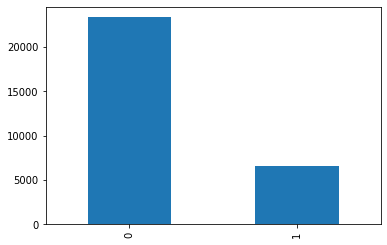

In [5]:
train['dpnm'].value_counts().plot.bar()

# imbalanced classes
# case 1 : Are positive classes more important?
# case 2 : Are both classes equally important?

# 1/ Based on Class (Yes/No)

# 1.1/ Calculate Accuracy

In [6]:
# Method 1 : Use LogisticRegression method
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

print(lr.score(X,y_actual))

0.5550333333333334


In [7]:
# Method 2 : Use sklearn.metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

# Import metric method
from sklearn.metrics import accuracy_score

print(accuracy_score(y_actual, y_predicted))

0.5550333333333334


# 1.2/ Recall

In [8]:
# Import metric method
from sklearn.metrics import recall_score

print(recall_score(y_actual, y_predicted))

0.72166968053044


# 1.3/ Precision

In [9]:
# Import metric method
from sklearn.metrics import precision_score

print(precision_score(y_actual, y_predicted))

0.2939659934933399


# 1.4/ f1 Score

In [10]:
# Import metric method
from sklearn.metrics import f1_score

print(f1_score(y_actual, y_predicted))

0.41776071880315785


# 1.5/ Classification Report - Combines Accuracy/Precision/Recall/f1 score

In [11]:
# Import metric method
from sklearn.metrics import classification_report

print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.51      0.64     23364
           1       0.29      0.72      0.42      6636

    accuracy                           0.56     30000
   macro avg       0.58      0.61      0.53     30000
weighted avg       0.74      0.56      0.59     30000



# 2/ Based on Probabilities ( score from 0.0 to 1.0 )

# 2.1/ roc auc score

In [12]:
# Import metric method
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_actual, y_predicted))

# Can also plotted using roc auc curve
# used when both classes are important

0.6146869203884865


# 3/ Print Score with proper formatting

In [13]:
# assign to a variable

train_accuracy = accuracy_score(y_actual, y_predicted)

print(train_accuracy)

0.5550333333333334


In [14]:
# Using %
# 1/ Provide the Decimals in Quote followed by %
# 2/ Provide the metrics (Variables or direction function)

print('%.2f' % train_accuracy)

0.56


In [15]:
# Using format
# 1/ Provide the Decimals in Curly Brackets followed by .format()
# 2/ Provide the metrics (Variables or direction function)

print('{0:.2f}'.format(train_accuracy))

0.56


In [16]:
# Print with text
print('Train Accuracy {0:.2f}'.format(train_accuracy))

Train Accuracy 0.56


# Next
- 1/ Confustion Matrix
- 2/ roc auc plot